In [27]:
%matplotlib inline

import numpy as np
from scipy import stats
import csv
import matplotlib.pyplot as plt

name_size_dict = {}
size_type_latency = {}

#read curl file to build a dictionary with filename matched to filesize in bytes 
with open('proxy_fixedfiles.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        code = rows[0]
        if code == '200':
            fname = rows[-1].split('/')[-1]
            size = rows[1]
            if fname not in name_size_dict:
                name_size_dict[fname] = int(size)
        else:
            continue

with open('ingressv2_type_nano_fname.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        type = rows[0]
        duration = int(rows[1])
        fname = rows[2]
        if (fname in name_size_dict and fname.endswith('dat')):
            size = name_size_dict[fname]
        else:
            continue
        if size not in size_type_latency:
            size_type_latency[size] = {}
            if type not in size_type_latency[size]:
                size_type_latency[size][type] = [duration]
            else:
                size_type_latency[size][type].append(duration)
        else:
            if type not in size_type_latency[size]:
                size_type_latency[size][type] = [duration]
            else:
                size_type_latency[size][type].append(duration)

with open('egressv2_type_nano_fname.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        type = rows[0]
        duration = int(rows[1])
        fname = rows[2]
        if (fname in name_size_dict and fname.endswith('dat')):
            size = name_size_dict[fname]
        else:
            continue
        if size not in size_type_latency:
            size_type_latency[size] = {}
            if type not in size_type_latency[size]:
                size_type_latency[size][type] = [duration]
            else:
                size_type_latency[size][type].append(duration)
        else:
            if type not in size_type_latency[size]:
                size_type_latency[size][type] = [duration]
            else:
                size_type_latency[size][type].append(duration)

                

sizelist = []
type1 = []
type2 = []
type3 = []
type4 = []
type5 = []
type6 = []
type7 = []
type8 = []
                
for size in sorted(size_type_latency):
    if size not in sizelist:
        sizelist.append(size)
    else:
        print('Error on:',size)
        
    for type in size_type_latency[size]:
        if type == '1':
            type1.append(np.mean(size_type_latency[size][type])/1000.0)
        elif type == '2':
            type2.append(np.mean(size_type_latency[size][type])/1000.0)
        elif type == '3':
            type3.append(np.mean(size_type_latency[size][type])/1000.0)
        elif type == '4':
            type4.append(np.mean(size_type_latency[size][type])/1000.0)
        elif type == '5':
            type5.append(np.mean(size_type_latency[size][type])/1000.0)
        elif type == '6':
            type6.append(np.mean(size_type_latency[size][type])/1000.0)
        elif type == '7':
            type7.append(np.mean(size_type_latency[size][type])/1000.0)
        elif type == '8':
            type8.append(np.mean(size_type_latency[size][type])/1000.0)
        else:
            print(type)
            break

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


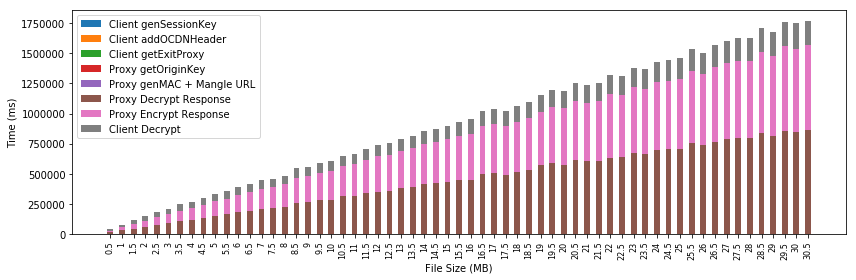

In [3]:
N = len(sizelist)
ind = np.arange(N)
width = .5

plt.figure(figsize=(12,4))

p1 = plt.bar(ind, type1, width)
p2 = plt.bar(ind, type2, width, bottom=type1)    
p3 = plt.bar(ind, type3, width, bottom=np.array(type1)+np.array(type2))
p4 = plt.bar(ind, type4, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)) 
p5 = plt.bar(ind, type5, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4))
p6 = plt.bar(ind, type6, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4)+np.array(type5))    
p7 = plt.bar(ind, type7, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4)+np.array(type5)+np.array(type6))
p8 = plt.bar(ind, type8, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4)+np.array(type5)+np.array(type6)+np.array(type7))

plt.yscale('symlog')
ticklist = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5','5.5','6','6.5','7','7.5','8','8.5','9','9.5','10','10.5','11','11.5','12','12.5','13','13.5','14','14.5','15','15.5','16','16.5','17','17.5','18','18.5','19','19.5','20','20.5','21','21.5','22','22.5','23','23.5','24','24.5','25','25.5','26','26.5','27','27.5','28','28.5','29','29.5','30','30.5']
plt.xticks(ind, ticklist, fontsize=8, rotation=90)
plt.xlabel('File Size (MB)')
plt.ylabel('Time (ms)')
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0],p6[0],p7[0],p8[0]), ('Client genSessionKey', 'Client addOCDNHeader','Client getExitProxy','Proxy getOriginKey','Proxy genMAC + Mangle URL','Proxy Decrypt Response','Proxy Encrypt Response','Client Decrypt'))
plt.legend(loc=2)

plt.tight_layout()
plt.savefig('log.pdf')
plt.clf()

p1 = plt.bar(ind, type1, width)
p2 = plt.bar(ind, type2, width, bottom=type1)    
p3 = plt.bar(ind, type3, width, bottom=np.array(type1)+np.array(type2))
p4 = plt.bar(ind, type4, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)) 
p5 = plt.bar(ind, type5, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4))
p6 = plt.bar(ind, type6, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4)+np.array(type5))    
p7 = plt.bar(ind, type7, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4)+np.array(type5)+np.array(type6))
p8 = plt.bar(ind, type8, width, bottom=np.array(type1)+np.array(type2)+np.array(type3)+np.array(type4)+np.array(type5)+np.array(type6)+np.array(type7))

ticklist = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5','5.5','6','6.5','7','7.5','8','8.5','9','9.5','10','10.5','11','11.5','12','12.5','13','13.5','14','14.5','15','15.5','16','16.5','17','17.5','18','18.5','19','19.5','20','20.5','21','21.5','22','22.5','23','23.5','24','24.5','25','25.5','26','26.5','27','27.5','28','28.5','29','29.5','30','30.5']
plt.xticks(ind, ticklist, fontsize=8, rotation=90)
plt.xlabel('File Size (MB)')
plt.ylabel('Time (ms)')
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0],p6[0],p7[0],p8[0]), ('Client genSessionKey', 'Client addOCDNHeader','Client getExitProxy','Proxy getOriginKey','Proxy genMAC + Mangle URL','Proxy Decrypt Response','Proxy Encrypt Response','Client Decrypt'))
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('stages.pdf')

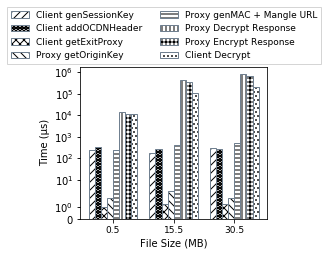

In [50]:
N = len(sizelist)
ind = np.arange(N)
width = .5       # the width of the bars: can also be len(x) sequence

#plt.figure(figsize=(6,4.5))
plt.figure(figsize=(3.35,2.8))

p1 = plt.bar(ind[::30]-10.5, type1[::30], width=3,align='center',hatch=3*'/',facecolor='none',edgecolor='slategrey')
p2 = plt.bar(ind[::30]-7.5, type2[::30], width=3,align='center',hatch=3*'O',facecolor='none',edgecolor='slategrey')    
p3 = plt.bar(ind[::30]-4.5, type3[::30], width=3,align='center',hatch=3*'x',facecolor='none',edgecolor='slategrey')
p4 = plt.bar(ind[::30]-1.5, type4[::30], width=3,align='center',hatch=3*'\\',facecolor='none',edgecolor='slategrey') 
p5 = plt.bar(ind[::30]+1.5, type5[::30], width=3,align='center',hatch=3*'-',facecolor='none',edgecolor='slategrey')
p6 = plt.bar(ind[::30]+4.5, type6[::30], width=3,align='center',hatch=3*'|',facecolor='none',edgecolor='slategrey')    
p7 = plt.bar(ind[::30]+7.5, type7[::30], width=3,align='center',hatch=3*'+',facecolor='none',edgecolor='slategrey')
p8 = plt.bar(ind[::30]+10.5, type8[::30], width=3,align='center',hatch=3*'.',facecolor='none',edgecolor='slategrey')
#plt.plot(ind[::5]+1.2, type8[::5])

#ax.bar(x-.5, list(map(sub, complete[0][::4],ttfb[0][::4])),color='r',width=0.5,bottom=ttfb[0][::4],align='center')
#b1 = ax.bar(x-0.4, list(map(sub, complete[1][::5],ttfb[1][::5])),width=0.2,bottom=ttfb[1][::5],align='center')
#ax.bar(x-0.2, list(map(sub, complete[2][::4],ttfb[2][::4])),width=0.2,bottom=ttfb[2][::4],align='center')
#b3 = ax.bar(x-0.2, list(map(sub, y3[::5],y3ttfb[::5])),width=0.2,bottom=y3ttfb[::5],align='center')
#ax.bar(x-0.1, list(map(sub, complete[4],ttfb[4])),width=0.2,bottom=ttfb[4],align='center')
#b5 = ax.bar(x, list(map(sub, complete[5][::5],ttfb[5][::5])),width=.2,bottom=ttfb[5][::5],align='center')
#ax.bar(x+0.1, list(map(sub, y6,y6ttfb)),width=0.2,bottom=y6ttfb,align='center')
#b7 = ax.bar(x+0.2,list(map(sub, y7[::5],y7ttfb[::5])),width=0.2,bottom=y7ttfb[::5],align='center')
#ax.bar(x+0.3, list(map(sub, complete[8],ttfb[8])),width=0.5,bottom=ttfb[8],align='center')
#b9 = ax.bar(x+0.4, list(map(sub, complete[9][::5],ttfb[9][::5])),width=0.2,bottom=ttfb[9][::5],align='center')
#ax.bar(x+1, list(map(sub, complete[10],ttfb[10])),width=0.5,bottom=ttfb[10],align='center')


#plt.ylim(0, 5)
plt.yscale('symlog')
ticklist = ['0.5','15.5','30.5']
plt.xticks(ind[::30], ticklist, fontsize=9)
plt.xlabel('File Size (MB)',fontsize=10)
plt.ylabel(u'Time (\u03bcs)',fontsize=10)
#plt.tight_layout()

plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0],p6[0],p7[0],p8[0]), ('Client genSessionKey', 'Client addOCDNHeader','Client getExitProxy','Proxy getOriginKey','Proxy genMAC + Mangle URL','Proxy Decrypt Response','Proxy Encrypt Response','Client Decrypt'),
           loc='upper center', bbox_to_anchor=(0.45, +1.42),
          fancybox=False, shadow=False, ncol=2,fontsize=9)

#plt.xlabel('test', fontsize=12)
#plt.xlim(0,100)
#plt.savefig('stackedbars.png') 

plt.savefig('loggrouped_2.pdf',bbox_inches="tight")
plt.show()

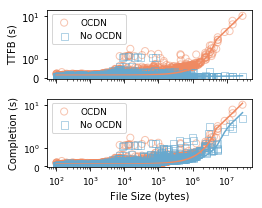

In [25]:
%matplotlib inline

import numpy as np
import types
from scipy import stats
import csv
import matplotlib.pyplot as plt

name_size_dict = {}
size_type_latency = {}
size_duration = {}
cipher_size_duration = {}


with open('plaintextv2_curl_httpresp_size_timeconnect_timestart_totaltime_url.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        code = rows[0]
        if code == '200':
            fname = rows[-1].split('/')[-1]
            size = int(rows[1])
            ttfb = float(rows[3])
            duration = float(rows[4])
            if size not in size_duration:
                size_duration[size] = [1,ttfb,duration]
            else:
                size_duration[size][0] += 1
                size_duration[size][1] += ttfb
                size_duration[size][2] += duration
        else:
            continue
            
with open('ciphertextv2_curl_httpresp_size_timeconnect_timestart_totaltime_url.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        code = rows[0]
        if code == '200':
            fname = rows[-1].split('/')[-1]
            size = int(rows[1])
            ttfb = float(rows[3])
            duration = float(rows[4])
            if size not in cipher_size_duration:
                cipher_size_duration[size] = [1,ttfb,duration]
            else:
                cipher_size_duration[size][0] += 1
                cipher_size_duration[size][1] += ttfb
                cipher_size_duration[size][2] += duration
        else:
            continue

            
# Create data
N = 60
cipherttfbx = []
cipherttfby = []
ciphercompletex = []
ciphercompletey = []
plainttfbx = []
plainttfby = []
plaincompletex = []
plaincompletey = []
            
for size in sorted(size_duration):
    if size in cipher_size_duration:
        cipherttfbx.append(size)
        cipherttfby.append(cipher_size_duration[size][1]/cipher_size_duration[size][0])
        ciphercompletex.append(size)
        ciphercompletey.append(cipher_size_duration[size][2]/cipher_size_duration[size][0])
        plainttfbx.append(size)
        plainttfby.append(size_duration[size][1]/size_duration[size][0])
        plaincompletex.append(size)
        plaincompletey.append(size_duration[size][2]/size_duration[size][0])
    else:
        break

data = ((cipherttfbx,cipherttfby),(ciphercompletex,ciphercompletey),(plainttfbx,plainttfby),(plaincompletex,plaincompletey))
data1 = ((cipherttfbx,cipherttfby),(plainttfbx,plainttfby))
data2 = ((ciphercompletex,ciphercompletey),(plaincompletex,plaincompletey))
colors = ("#ef8a62","#67a9cf")
groups = ("OCDN TTFB", "OCDN Total", "No OCDN TTFB","No OCDN Total")
groups1 = ("OCDN", "No OCDN")
groups2 = ("OCDN", "No OCDN")

#fig = plt.figure(figsize=(4.5,3))
fig = plt.figure(figsize=(3,2))

ax = plt.subplot(111)
for data, color, group in zip(data1, colors, groups1):
    x,y = data
    mark = 's'
    if(group == 'OCDN'):
        mark = 'o'
    plt.scatter(x,y,alpha=0.5,edgecolors=color, s=50, label=group, marker=mark, facecolors='none')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c=color)

plt.ylim(-.05, 15)
plt.yscale('symlog')
plt.xscale('log')

plt.yticks(fontsize=9)
plt.xticks(fontsize=9)    


plt.xlabel('File Size (bytes)',fontsize=10)
plt.ylabel('TTFB (s)',fontsize=10)
plt.legend(loc=2,fontsize=10)
plt.tight_layout()
plt.savefig('TTFB_2.pdf')

plt.clf()
colors = ("#ef8a62","#67a9cf")

for data, color, group in zip(data2, colors, groups2):
    x,y = data  
    mark = 's'
    if(group == 'OCDN'):
        mark = 'o'
    plt.scatter(x,y,alpha=0.5,edgecolors=color, s=50, label=group, marker=mark, facecolors='none')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c=color)

plt.ylim(-.05, 15)
plt.yscale('symlog')
plt.xscale('log')

plt.yticks(fontsize=9)
plt.xticks(fontsize=9)    


plt.xlabel('File Size (bytes)',fontsize=10)
plt.ylabel('Completion (s)',fontsize=10)
plt.legend(loc=2,fontsize=10)
plt.tight_layout()

plt.savefig('Completion_2.pdf')
plt.clf()

colors = ("#ef8a62","#67a9cf")

f, axarr = plt.subplots(2, sharex=True,sharey=True,figsize=(3.75,3))
for data, color, group in zip(data1, colors, groups1):
    x,y = data
    mark = 's'
    if(group == 'OCDN'):
        mark = 'o'
    axarr[0].scatter(x,y,alpha=0.5,edgecolors=color, s=50, label=group, marker=mark, facecolors='none')
    axarr[0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c=color)

    
for data, color, group in zip(data2, colors, groups2):
    x,y = data  
    mark = 's'
    if(group == 'OCDN'):
        mark = 'o'
    axarr[1].scatter(x,y,alpha=0.5,edgecolors=color, s=50, label=group, marker=mark, facecolors='none')
    axarr[1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c=color)
    
plt.ylim(-.05, 15)
plt.yscale('symlog')
plt.xscale('log')

plt.yticks(fontsize=9)
plt.xticks(fontsize=9)    


axarr[1].set_xlabel('File Size (bytes)',fontsize=10)
axarr[0].set_ylabel('TTFB (s)',fontsize=10)
#axarr[0].set_yticks([0,5,10])
#axarr[1].set_yticks([0,5,10])

axarr[1].set_ylabel('Completion (s)',fontsize=10)
axarr[0].legend(loc=2,fontsize=9)
axarr[1].legend(loc=2,fontsize=9)

plt.tight_layout()
plt.savefig('combined.pdf')
plt.show()



            

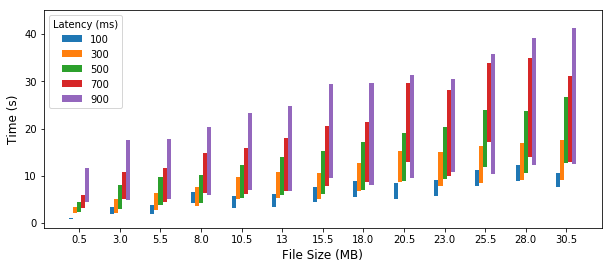

In [13]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np
import datetime,csv
from operator import sub

ttfb = {}
complete = {}

for i in range(0,1100000,100000):
    with open('proxy_latency_fixedfiles_'+str(i)+'.csv', mode='r') as infile:
        reader = csv.reader(infile)
        index = int(i/100000)
        for rows in reader:
            if index not in complete:
                complete[index] = []
                ttfb[index] = []
            complete[index].append((float(rows[4])))
            ttfb[index].append((float(rows[3])))

x = np.arange(2, 28, 2)

y3 = [3.311119,3.509573,4.317058,4.345336,5.140434,5.165474,5.355764,6.012863,6.055574,6.180719,6.392371,7.298574,7.220198,7.343036,7.438858,7.714033,8.777118,8.292771,8.533818,10.342086,9.808556,9.390424,9.825711,9.74037,11.107985,10.77431,9.807756,10.543549,11.420797,10.513682,10.504277,10.758101,11.356099,12.162553,12.511481,12.711568,12.021728,12.165985,12.258024,13.864931,15.210065,14.043408,14.187104,15.906113,15.74027,15.139431,14.853271,14.31073,18.379572,16.684463,16.217885,16.006624,15.346537,17.444837,16.206845,16.953912,16.566082,18.427209,16.423821,18.57653,17.576691]
y3ttfb = [2.109953,1.707751,1.91526,1.943191,2.138288,2.163116,2.352432,2.410191,2.452761,2.577105,2.787656,3.095809,3.016464,3.138385,3.233775,3.508997,3.972513,3.488783,3.728466,5.535628,5.002279,4.584567,4.850907,4.336774,5.70269,5.368652,4.401449,5.137983,6.015941,5.06605,5.09806,5.090032,5.351519,6.158858,6.505397,6.705409,6.014465,5.937876,5.651947,7.258504,8.603017,7.436006,7.579984,9.003409,8.536155,7.935346,7.647339,7.103534,10.786958,9.062726,8.412737,8.199503,7.539397,9.637654,8.398213,9.10792,8.158845,10.02015,8.015124,10.168392,9.169394]
y6ttfb = [2.778469,2.948772,3.152304,3.202462,3.30435,3.670579,3.75794,3.680178,4.298922,4.222462,4.007956,4.530494,4.199927,4.899267,4.773435,5.112137,4.968779,5.213272,5.613475,5.500096,5.551747,5.651034,5.75033,5.961609,6.543632,6.779981,9.706229,7.744274,7.014598,6.769592,7.986354,7.199192,7.168006,7.407839,7.785677,7.921805,8.475371,8.476209,8.521199,8.777191,9.399451,9.590269,9.436903,11.633699,11.132438,9.495283,9.796255,9.579542,10.366451,12.799849,10.149058,11.212085,12.043355,12.159519,11.098032,10.364875,11.621448,11.986989,11.049742,11.4619,12.178299]
y6 = [5.179469,6.549942,6.753179,10.44638,8.146228,12.074173,9.760565,9.684063,13.902051,10.226685,13.612278,11.734228,13.804839,12.102656,14.379993,12.316481,15.773028,16.01783,14.016749,13.903949,16.357576,16.495092,14.156158,14.407989,16.14728,16.384422,19.31068,19.791018,16.620338,16.413453,18.790654,18.003946,17.972607,20.65501,18.592591,18.767829,19.364478,20.48124,20.526285,23.224868,21.405869,21.634703,21.527677,24.839235,24.33859,22.701342,23.002886,22.786528,23.611816,27.205699,24.555309,25.619325,26.45092,26.566417,25.543655,25.971231,27.227893,27.592943,26.656833,30.66767,31.384859]

y7 = complete[7]
y7ttfb = ttfb[7]
y0 = complete[0]
y0ttfb = ttfb[0]
sizes = [512000,1024000,1536000,2048000,2560000,3072000,3584000,4096000,4608000,5120000,5632000,6144000,6656000,7168000,7680000,8192000,8704000,9216000,9728000,10240000,10752000,11264000,11776000,12288000,12800000,13312000,13824000,14336000,14848000,15360000,15872000,16384000,16896000,17408000,17920000,18432000,18944000,19456000,19968000,20480000,20992000,21504000,22016000,22528000,23040000,23552000,24064000,24576000,25088000,25600000,26112000,26624000,27136000,27648000,28160000,28672000,29184000,29696000,30208000,30720000,31232000]

fig = plt.figure(figsize=(10,4))
ax = plt.subplot(111)
#ax.bar(x-.5, list(map(sub, complete[0][::4],ttfb[0][::4])),color='r',width=0.5,bottom=ttfb[0][::4],align='center')
b1 = ax.bar(x-0.4, list(map(sub, complete[1][::5],ttfb[1][::5])),width=0.2,bottom=ttfb[1][::5],align='center')
#ax.bar(x-0.2, list(map(sub, complete[2][::4],ttfb[2][::4])),width=0.2,bottom=ttfb[2][::4],align='center')
b3 = ax.bar(x-0.2, list(map(sub, y3[::5],y3ttfb[::5])),width=0.2,bottom=y3ttfb[::5],align='center')
#ax.bar(x-0.1, list(map(sub, complete[4],ttfb[4])),width=0.2,bottom=ttfb[4],align='center')
b5 = ax.bar(x, list(map(sub, complete[5][::5],ttfb[5][::5])),width=.2,bottom=ttfb[5][::5],align='center')
#ax.bar(x+0.1, list(map(sub, y6,y6ttfb)),width=0.2,bottom=y6ttfb,align='center')
b7 = ax.bar(x+0.2,list(map(sub, y7[::5],y7ttfb[::5])),width=0.2,bottom=y7ttfb[::5],align='center')
#ax.bar(x+0.3, list(map(sub, complete[8],ttfb[8])),width=0.5,bottom=ttfb[8],align='center')
b9 = ax.bar(x+0.4, list(map(sub, complete[9][::5],ttfb[9][::5])),width=0.2,bottom=ttfb[9][::5],align='center')
#ax.bar(x+1, list(map(sub, complete[10],ttfb[10])),width=0.5,bottom=ttfb[10],align='center')

ax.legend((b1[0], b3[0],b5[0],b7[0],b9[0]), ('100', '300','500','700','900'),title='Latency (ms)')

#plt.xticks(x)

ticklist = ['0.5','3.0','5.5','8.0','10.5','13','15.5','18.0','20.5','23.0','25.5','28.0','30.5']
plt.xticks(x, ticklist, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(-1,45)
#plt.yscale('symlog')
plt.xlabel('File Size (MB)',fontsize=12)
plt.ylabel('Time (s)',fontsize=12)
plt.savefig('Latency.pdf')

plt.show()

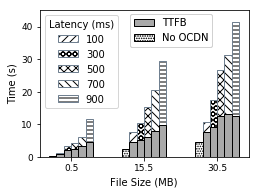

In [63]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np
import datetime,csv
from operator import sub

ttfb = {}
complete = {}
nopttfb = {}
nopcomplete = {}

for i in range(0,1100000,100000):
    with open('noproxy_latency_fixedfiles_'+str(i)+'.csv', mode='r') as infile:
        reader = csv.reader(infile)
        index = int(i/100000)
        for rows in reader:
            if index not in nopcomplete:
                nopcomplete[index] = []
                nopttfb[index] = []
            nopcomplete[index].append((float(rows[4])))
            nopttfb[index].append((float(rows[3])))

for i in range(0,1100000,100000):
    with open('proxy_latency_fixedfiles_'+str(i)+'.csv', mode='r') as infile:
        reader = csv.reader(infile)
        index = int(i/100000)
        for rows in reader:
            if index not in complete:
                complete[index] = []
                ttfb[index] = []
            complete[index].append((float(rows[4])))
            ttfb[index].append((float(rows[3])))

x = np.arange(2, 8, 2)

y3 = [3.311119,3.509573,4.317058,4.345336,5.140434,5.165474,5.355764,6.012863,6.055574,6.180719,6.392371,7.298574,7.220198,7.343036,7.438858,7.714033,8.777118,8.292771,8.533818,10.342086,9.808556,9.390424,9.825711,9.74037,11.107985,10.77431,9.807756,10.543549,11.420797,10.513682,10.504277,10.758101,11.356099,12.162553,12.511481,12.711568,12.021728,12.165985,12.258024,13.864931,15.210065,14.043408,14.187104,15.906113,15.74027,15.139431,14.853271,14.31073,18.379572,16.684463,16.217885,16.006624,15.346537,17.444837,16.206845,16.953912,16.566082,18.427209,16.423821,18.57653,17.576691]
y3ttfb = [2.109953,1.707751,1.91526,1.943191,2.138288,2.163116,2.352432,2.410191,2.452761,2.577105,2.787656,3.095809,3.016464,3.138385,3.233775,3.508997,3.972513,3.488783,3.728466,5.535628,5.002279,4.584567,4.850907,4.336774,5.70269,5.368652,4.401449,5.137983,6.015941,5.06605,5.09806,5.090032,5.351519,6.158858,6.505397,6.705409,6.014465,5.937876,5.651947,7.258504,8.603017,7.436006,7.579984,9.003409,8.536155,7.935346,7.647339,7.103534,10.786958,9.062726,8.412737,8.199503,7.539397,9.637654,8.398213,9.10792,8.158845,10.02015,8.015124,10.168392,9.169394]
y6ttfb = [2.778469,2.948772,3.152304,3.202462,3.30435,3.670579,3.75794,3.680178,4.298922,4.222462,4.007956,4.530494,4.199927,4.899267,4.773435,5.112137,4.968779,5.213272,5.613475,5.500096,5.551747,5.651034,5.75033,5.961609,6.543632,6.779981,9.706229,7.744274,7.014598,6.769592,7.986354,7.199192,7.168006,7.407839,7.785677,7.921805,8.475371,8.476209,8.521199,8.777191,9.399451,9.590269,9.436903,11.633699,11.132438,9.495283,9.796255,9.579542,10.366451,12.799849,10.149058,11.212085,12.043355,12.159519,11.098032,10.364875,11.621448,11.986989,11.049742,11.4619,12.178299]
y6 = [5.179469,6.549942,6.753179,10.44638,8.146228,12.074173,9.760565,9.684063,13.902051,10.226685,13.612278,11.734228,13.804839,12.102656,14.379993,12.316481,15.773028,16.01783,14.016749,13.903949,16.357576,16.495092,14.156158,14.407989,16.14728,16.384422,19.31068,19.791018,16.620338,16.413453,18.790654,18.003946,17.972607,20.65501,18.592591,18.767829,19.364478,20.48124,20.526285,23.224868,21.405869,21.634703,21.527677,24.839235,24.33859,22.701342,23.002886,22.786528,23.611816,27.205699,24.555309,25.619325,26.45092,26.566417,25.543655,25.971231,27.227893,27.592943,26.656833,30.66767,31.384859]

y7 = complete[7]
y7ttfb = ttfb[7]
y0 = complete[0]
y0ttfb = ttfb[0]
sizes = [512000,1024000,1536000,2048000,2560000,3072000,3584000,4096000,4608000,5120000,5632000,6144000,6656000,7168000,7680000,8192000,8704000,9216000,9728000,10240000,10752000,11264000,11776000,12288000,12800000,13312000,13824000,14336000,14848000,15360000,15872000,16384000,16896000,17408000,17920000,18432000,18944000,19456000,19968000,20480000,20992000,21504000,22016000,22528000,23040000,23552000,24064000,24576000,25088000,25600000,26112000,26624000,27136000,27648000,28160000,28672000,29184000,29696000,30208000,30720000,31232000]

fig = plt.figure(figsize=(3.7,2.8))
ax = plt.subplot(111)
#ax.bar(x-.5, list(map(sub, complete[0][::4],ttfb[0][::4])),color='r',width=0.5,bottom=ttfb[0][::4],align='center')
#b0 = ax.bar(x-0.5, list(map(sub, complete[0][::30],ttfb[0][::30])),width=0.2,bottom=ttfb[0][::30],align='center',hatch=3*'.',facecolor='none',edgecolor='slategrey')
b1 = ax.bar(x-0.3, list(map(sub, complete[1][::30],ttfb[1][::30])),width=0.2,bottom=ttfb[1][::30],align='center',hatch=3*'/',facecolor='none',edgecolor='slategrey')
b3 = ax.bar(x-0.1, list(map(sub, y3[::30],y3ttfb[::30])),width=0.2,bottom=y3ttfb[::30],align='center',hatch=2*'O',facecolor='none',edgecolor='slategrey')
b5 = ax.bar(x+0.1, list(map(sub, complete[5][::30],ttfb[5][::30])),width=.2,bottom=ttfb[5][::30],align='center',hatch=3*'x',facecolor='none',edgecolor='slategrey')
b7 = ax.bar(x+0.3,list(map(sub, y7[::30],y7ttfb[::30])),width=0.2,bottom=y7ttfb[::30],align='center',hatch=3*'\\',facecolor='none',edgecolor='slategrey')
b9 = ax.bar(x+0.5, list(map(sub, complete[9][::30],ttfb[9][::30])),width=0.2,bottom=ttfb[9][::30],align='center',hatch=3*'-',facecolor='none',edgecolor='slategrey')

#ax.bar(x+1, list(map(sub, complete[10],ttfb[10])),width=0.5,bottom=ttfb[10],align='center')

l1 = ax.legend((b1[0], b3[0],b5[0],b7[0],b9[0]), ('100', '300','500','700','900'),title='Latency (ms)',loc=2)
ax.add_artist(l1)

#ax.bar(x-0.4, list(ttfb[0][::30]),width=0.2,color='darkgrey',align='center',edgecolor='k')
handle = ax.bar(x-0.3, list(ttfb[1][::30]),width=0.2,color='darkgrey',align='center',edgecolor='k')
#l2 = ax.legend(handle,['TTFB'],bbox_to_anchor=(0.225, +.485))
#ax.add_artist(l2)
ax.bar(x-0.1, list(ttfb[3][::30]),width=0.2,color='darkgrey',align='center',edgecolor='k')
ax.bar(x+0.1, list(ttfb[5][::30]),width=0.2,color='darkgrey',align='center',edgecolor='k')
ax.bar(x+0.3, list(ttfb[7][::30]),width=0.2,color='darkgrey',align='center',edgecolor='k')
ax.bar(x+0.5, list(ttfb[9][::30]),width=0.2,color='darkgrey',align='center',edgecolor='k')

handle = ax.bar(x-0.5, list(nopttfb[0]),width=0.2,color='darkgrey',align='center',edgecolor='k')
handle2 = ax.bar(x-0.5, list(nopcomplete[0]),width=0.2,bottom=nopttfb[0],align='center',hatch=5*'.',facecolor='none',edgecolor='k')
#l3 = ax.legend(handle,['No OCDN'],bbox_to_anchor=(0.275, +.375))
#ax.add_artist(l3)
l2 = ax.legend((handle,handle2),['TTFB','No OCDN'],bbox_to_anchor=(0.85, +.718))
ax.add_artist(l2)

#plt.xticks(x)

ticklist = ['0.5','15.5','30.5']
plt.xticks(x, ticklist, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0,45)
#ax.xaxis_date()
#plt.yscale('symlog')
plt.xlabel('File Size (MB)',fontsize=10)
plt.ylabel('Time (s)',fontsize=10)
plt.savefig('Latency_withoutzero_2.pdf',bbox_inches="tight")
plt.tight_layout()
plt.show()